In [198]:
import pandas as pd
import numpy as np
import seaborn as sns

Tasking...:

Apply data analysis on 'bikes.csv' dataset.
here is some questions to think about 
1. Make Profit Feature.
    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.
2. Distribution rental_bikes_count & profit.
3. Profit for each day.
4. Which season that has more registeration & profit.
5. Which weather condition that has more registeration & profit.
6. Correlation between profit & bikes count with all features.
7. Rentals during rush hours (7-9 am & 3-5 pm).
7. Rentals during workday & holiday.
8. Registered or casual is more.
9. What is the average of bikes would be registered during the week.
10. Schools (9-12) & (2-6) profit.
11. Profit in 2011 & saturdays & season fall

In [199]:
df=pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 20\Assiment\Assignment datasets\Bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [200]:
# 1.Make Profit Feature

In [201]:
df['Profit'] = (df['registered'] * 5 + df['casual'] * 20) * (1 - 0.14) - 1500
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5


In [202]:
# 2. Distribution of rental_bikes_count & profit

<Axes: xlabel='rented_bikes_count', ylabel='Profit'>

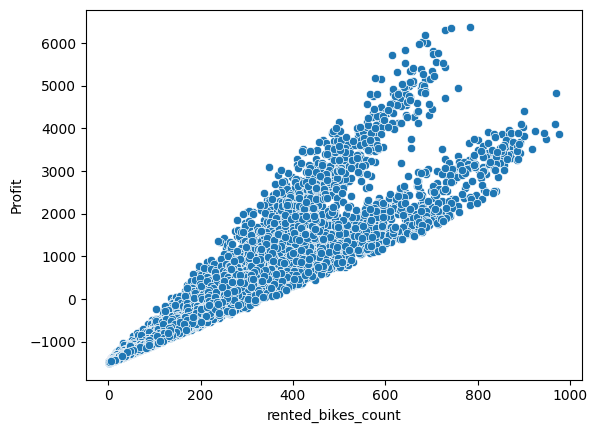

In [203]:
sns.scatterplot(x=df['rented_bikes_count'],y=df['Profit'])

In [204]:
# 3. Profit for each day

In [205]:
daily_profit = df.groupby('datetime')['Profit'].sum()
daily_profit

datetime
2011-01-01 00:00:00   -1392.5
2011-01-01 01:00:00   -1224.8
2011-01-01 02:00:00   -1297.9
2011-01-01 03:00:00   -1405.4
2011-01-01 04:00:00   -1495.7
                        ...  
2012-12-19 19:00:00      35.1
2012-12-19 20:00:00    -334.7
2012-12-19 21:00:00    -726.0
2012-12-19 22:00:00    -790.5
2012-12-19 23:00:00   -1070.0
Name: Profit, Length: 10886, dtype: float64

In [206]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [207]:
# 4. Season with more registration & profit

In [208]:
season_registration = df.groupby('season')['registered'].sum()
season_profit = df.groupby('season')['Profit'].sum()

In [209]:
season_registration

season
Fall      488252
Spring    265322
Summer    446991
Winter    457276
Name: registered, dtype: int64

In [210]:
season_profit

season
Fall       489754.0
Spring   -2114255.0
Summer      89232.1
Winter    -745527.2
Name: Profit, dtype: float64

In [211]:
# 5. Weather condition with more registration & profit

In [212]:
weather_registration=df.groupby('weather')['registered'].sum()
weather_profit=df.groupby('weather')['Profit'].sum()

In [213]:
weather_registration

weather
Clear    951449
Mist     336229
Rainy     70204
Snowy       158
Name: registered, dtype: int64

In [214]:
weather_profit

weather
Clear   -625808.9
Mist    -742791.7
Rainy   -529778.0
Snowy      -717.4
Name: Profit, dtype: float64

In [215]:
# 6. Correlation between profit & bikes count with all features

In [216]:
correlation=df[['Profit', 'rented_bikes_count', 'holiday','workingday','temp','humidity','windspeed','casual','registered']].corr()
correlation

,Profit,rented_bikes_count,holiday,workingday,temp,humidity,windspeed,casual,registered
Profit,1.000000,0.934490,0.017410,-0.150218,0.462618,-0.358150,0.100205,0.902713,0.822156
rented_bikes_count,0.934490,1.000000,-0.005827,0.010940,0.391867,-0.317282,0.097747,0.690414,0.970948
holiday,0.017410,-0.005827,1.000000,-0.249189,-0.001047,0.016190,0.010463,0.042519,-0.021017
workingday,-0.150218,0.010940,-0.249189,1.000000,0.018954,-0.019167,0.020668,-0.318348,0.118612
temp,0.462618,0.391867,-0.001047,0.018954,1.000000,-0.068240,-0.025425,0.466035,0.315430
humidity,-0.358150,-0.317282,0.016190,-0.019167,-0.068240,1.000000,-0.312628,-0.344939,-0.266432
windspeed,0.100205,0.097747,0.010463,0.020668,-0.025425,-0.312628,1.000000,0.085055,0.089105
casual,0.902713,0.690414,0.042519,-0.318348,0.466035,-0.344939,0.085055,1.000000,0.497250
registered,0.822156,0.970948,-0.021017,0.118612,0.315430,-0.266432,0.089105,0.497250,1.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [218]:
df['datetime']=pd.to_datetime(df['datetime'])

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [220]:
df['hours'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22


In [221]:
# 7. Rentals during rush hours (7-9 am & 3-5 pm)

In [222]:
rush_hour_rentals = df[(df['hours'].isin([7, 8, 15, 16]))]
rush_hour_rentals

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours
7,2011-01-01 07:00:00,Spring,0.0,0.0,Clear,8.20,NaN,NaN,1,2,3,-1474.2,7
8,2011-01-01 08:00:00,Spring,0.0,0.0,NaN,9.84,NaN,0.0000,1,7,8,-1452.7,8
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,19.9995,40,70,110,-511.0,15
16,2011-01-01 16:00:00,Spring,0.0,0.0,Mist,17.22,82.0,19.9995,41,52,93,-571.2,16
30,2011-01-02 07:00:00,Spring,0.0,0.0,NaN,16.40,NaN,12.9980,0,1,1,-1495.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10854,2012-12-18 16:00:00,Winter,0.0,1.0,NaN,NaN,41.0,31.0009,40,323,363,576.9,16
10869,2012-12-19 07:00:00,Winter,0.0,1.0,Clear,NaN,75.0,NaN,3,360,363,99.6,7
10870,2012-12-19 08:00:00,Winter,0.0,1.0,Clear,NaN,87.0,NaN,13,665,678,1583.1,8
10877,2012-12-19 15:00:00,Winter,NaN,1.0,Clear,NaN,50.0,19.0012,28,209,237,-119.7,15


In [223]:
# 8. Rentals during workday & holiday

In [224]:
workday_rentals = df[df['workingday'] == 1]['rented_bikes_count'].sum()
holiday_rentals = df[df['workingday'] == 0]['rented_bikes_count'].sum()

In [225]:
workday_rentals

1226368

In [226]:
holiday_rentals

569063

In [227]:
# 9. Registered vs Casual users

In [228]:
registered_count = df['registered'].sum()
casual_count = df['casual'].sum()

In [229]:
registered_count

1693341

In [230]:
casual_count

392135

In [231]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22


In [232]:
# 11. Schools (9-12) & (2-6) profit

In [233]:
school_hours_profit = df[(df['hours'].isin(range(9, 13)) | df['hours'].isin(range(14, 19)))]['Profit'].sum()

In [234]:
school_hours_profit

2254557.0999999996

In [235]:
df['year'] = df['datetime'].dt.year
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,2011
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,2011
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,2011
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20,2012
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,2012
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22,2012


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  hours               10886 non-null  int32         
 13  year                10886 non-null  int32     

In [237]:
df.isnull().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
hours                    0
year                     0
dtype: int64

In [238]:
df.dropna(axis=0)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011
14,2011-01-01 14:00:00,Spring,0.0,0.0,Mist,18.86,72.0,19.0012,35,71,106,-592.7,14,2011
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,19.9995,40,70,110,-511.0,15,2011
16,2011-01-01 16:00:00,Spring,0.0,0.0,Mist,17.22,82.0,19.9995,41,52,93,-571.2,16,2011
26,2011-01-02 02:00:00,Spring,0.0,0.0,Mist,17.22,100.0,19.0012,1,8,9,-1448.4,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,2012-12-18 06:00:00,Winter,0.0,1.0,Clear,14.76,93.0,11.0014,1,117,118,-979.7,6,2012
10848,2012-12-18 10:00:00,Winter,0.0,1.0,Clear,18.04,77.0,6.0032,22,162,184,-425.0,10,2012
10873,2012-12-19 11:00:00,Winter,0.0,1.0,Clear,16.40,54.0,15.0013,31,169,200,-240.1,11,2012
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012


In [239]:
str(df[df.holiday.isnull()][['holiday','workingday']].loc[11]['workingday'])

'0.0'

In [240]:
def map_holiday(x):
    #return pd.Series((x['holiday']+1,x['workingday']+2))
    if str(x['holiday']) == 'nan' and  str(x['workingday'])!='nan':
        return  1 if x['workingday']!=1 else 0
    else:
        return x['holiday']
        

df['holiday']=df[['holiday','workingday']].apply(map_holiday,axis=1)

In [241]:
def map_workingday(x):
    #return pd.Series((x['holiday']+1,x['workingday']+2))
    if str(x['workingday']) == 'nan' and  str(x['holiday'])!='nan':
        return  1 if x['holiday']!=1 else 0
    else:
        return x['workingday']
        

df['workingday']=df[['holiday','workingday']].apply(map_workingday,axis=1)

In [242]:
df.isnull().sum()

datetime                 0
season                 214
holiday                120
workingday             120
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
hours                    0
year                     0
dtype: int64

In [243]:
df['datetime']=pd.to_datetime(df['datetime'])


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10766 non-null  float64       
 3   workingday          10766 non-null  float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  hours               10886 non-null  int32         
 13  year                10886 non-null  int32     

In [245]:
df['datetime'].dt.day_name()

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [246]:
str(df[df['season'].isnull()]['season'].loc[4])

'nan'

In [247]:
df['month']=df['datetime'].dt.month
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,2011,1
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,2011,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,2011,1
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011,1
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012,12
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20,2012,12
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,2012,12
10884,2012-12-19 22:00:00,Winter,0.0,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22,2012,12


In [248]:
df[df['month'].isin([1,2,3])]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,2011,1
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,2011,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,2011,1
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011,1
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2012-03-19 19:00:00,Spring,0.0,1.0,Clear,25.42,61.0,15.0013,86,463,549,1970.1,19,2012,3
6781,2012-03-19 20:00:00,Spring,0.0,1.0,NaN,24.60,64.0,15.0013,34,296,330,357.6,20,2012,3
6782,2012-03-19 21:00:00,Spring,0.0,1.0,Clear,24.60,NaN,11.0014,33,190,223,-115.4,21,2012,3
6783,2012-03-19 22:00:00,Spring,0.0,1.0,Mist,22.96,73.0,11.0014,17,131,148,-644.3,22,2012,3


In [249]:
df.season.unique()

array(['Spring', nan, 'Summer', 'Fall', 'Winter'], dtype=object)

In [250]:
def map_season(x):
    if str(x['season']) == 'nan':
        if x['month'] in ([12,1,2]):
            return 'Winter'
        elif x['month'] in ([3,4,5]):
            return 'Spring'
        elif x['month'] in ([6,7,8]):
            return 'Summer'
        else:
            return 'Fall'
    else:
        return  x['season']
df['season']=df.apply(map_season,axis=1)

In [251]:
df.isnull().sum()

datetime                 0
season                   0
holiday                120
workingday             120
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
hours                    0
year                     0
month                    0
dtype: int64

In [252]:
df['day_name']=df['datetime'].dt.day_name()
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month,day_name
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,-1392.5,0,2011,1,Saturday
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,-1224.8,1,2011,1,Saturday
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,-1297.9,2,2011,1,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011,1,Saturday
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,-1495.7,4,2011,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012,12,Wednesday
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,-334.7,20,2012,12,Wednesday
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,2012,12,Wednesday
10884,2012-12-19 22:00:00,Winter,0.0,1.0,Clear,13.94,NaN,6.0032,12,117,129,-790.5,22,2012,12,Wednesday


In [253]:
def map_holi_wo(x):
    if str(x['holiday']) == 'nan':
        if x['day_name']=='Saturday' or x['day_name']=='Sunday':
            return pd.Series((1.0,0.0))
        else:
            return pd.Series((0.0,1.0))
    else:
        return pd.Series((x['holiday'],x['workingday']))
    
    
df[['holiday','workingday']]=df.apply(map_holi_wo,axis=1)

In [254]:
df.isnull().sum()

datetime                 0
season                   0
holiday                  0
workingday               0
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
hours                    0
year                     0
month                    0
day_name                 0
dtype: int64

In [255]:
df.dropna(axis=0,inplace=True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809 entries, 3 to 10885
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2809 non-null   datetime64[ns]
 1   season              2809 non-null   object        
 2   holiday             2809 non-null   float64       
 3   workingday          2809 non-null   float64       
 4   weather             2809 non-null   object        
 5   temp                2809 non-null   float64       
 6   humidity            2809 non-null   float64       
 7   windspeed           2809 non-null   float64       
 8   casual              2809 non-null   int64         
 9   registered          2809 non-null   int64         
 10  rented_bikes_count  2809 non-null   int64         
 11  Profit              2809 non-null   float64       
 12  hours               2809 non-null   int32         
 13  year                2809 non-null   int32         
 

In [257]:
df[['casual','registered']]

,casual,registered
3,3,10
11,26,30
14,35,71
15,40,70
16,41,52
...,...,...
10872,17,147
10873,31,169
10881,7,329
10883,4,164


In [258]:
def profit(x):
    revenue=x['casual']*20+x['registered']*5
    taxes=0.14*revenue
    maint=1500/(365*24)
    total_profit=revenue-(taxes+maint)
    
    return total_profit

df['profit']=df.apply(profit,axis=1)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month,day_name,profit
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011,1,Saturday,94.428767
11,2011-01-01 11:00:00,Spring,1.0,0.0,Clear,14.76,81.0,19.0012,26,30,56,-923.8,11,2011,1,Saturday,576.028767
14,2011-01-01 14:00:00,Spring,0.0,0.0,Mist,18.86,72.0,19.0012,35,71,106,-592.7,14,2011,1,Saturday,907.128767
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,19.9995,40,70,110,-511.0,15,2011,1,Saturday,988.828767
16,2011-01-01 16:00:00,Spring,0.0,0.0,Mist,17.22,82.0,19.9995,41,52,93,-571.2,16,2011,1,Saturday,928.628767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,2012-12-19 10:00:00,Winter,0.0,1.0,Clear,13.12,70.0,7.0015,17,147,164,-575.5,10,2012,12,Wednesday,924.328767
10873,2012-12-19 11:00:00,Winter,0.0,1.0,Clear,16.40,54.0,15.0013,31,169,200,-240.1,11,2012,12,Wednesday,1259.728767
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012,12,Wednesday,1534.928767
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,2012,12,Wednesday,773.828767


In [259]:
df[['rented_bikes_count','profit']].corr()

,rented_bikes_count,profit
rented_bikes_count,1.000000,0.934787
profit,0.934787,1.000000


<Axes: xlabel='rented_bikes_count', ylabel='profit'>

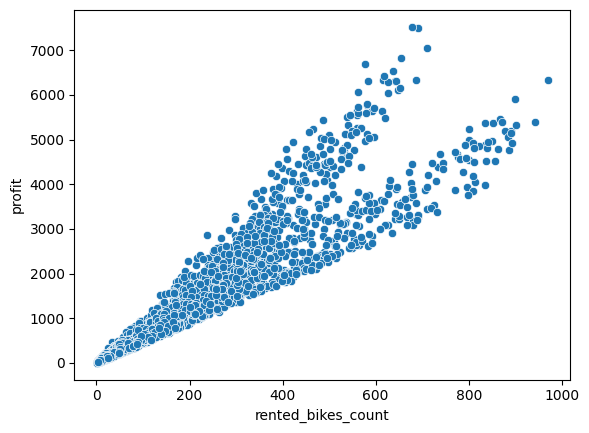

In [260]:
sns.scatterplot(x=df['rented_bikes_count'],y=df['profit'])

In [261]:
df[['day_name','profit']]

,day_name,profit
3,Saturday,94.428767
11,Saturday,576.028767
14,Saturday,907.128767
15,Saturday,988.828767
16,Saturday,928.628767
...,...,...
10872,Wednesday,924.328767
10873,Wednesday,1259.728767
10881,Wednesday,1534.928767
10883,Wednesday,773.828767


In [262]:
df.groupby('day_name')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,390.0,1207.544408,1068.976562,4.128767,305.128767,982.378767,1769.278767,5908.028767
Monday,430.0,1178.818767,1160.599787,4.128767,211.603767,853.378767,1811.203767,5383.428767
Saturday,408.0,1704.546904,1774.009602,4.128767,348.128767,975.928767,2555.103767,7524.828767
Sunday,390.0,1552.492613,1577.798701,4.128767,309.428767,778.128767,2477.703767,6338.028767
Thursday,398.0,1115.776003,1123.363578,4.128767,175.053767,907.128767,1609.103767,5460.828767
Tuesday,399.0,1152.131775,1139.230455,4.128767,216.978767,816.828767,1756.378767,6338.028767
Wednesday,394.0,1117.272168,1092.864006,4.128767,268.578767,810.378767,1725.203767,5185.628767


In [263]:
df.describe()

,datetime,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month,profit
count,2809,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,2011-12-29 05:21:10.060519680,0.051976,0.726237,20.184144,61.785333,12.866132,36.217159,155.099680,191.316839,-210.136241,11.581346,2011.504450,6.556426,1289.692526
min,2011-01-01 03:00:00,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,-1495.700000,0.000000,2011.000000,1.000000,4.128767
25%,2011-07-03 08:00:00,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,35.000000,45.000000,-1233.400000,6.000000,2011.000000,4.000000,266.428767
50%,2012-01-03 02:00:00,0.000000,1.000000,20.500000,62.000000,12.998000,16.000000,118.000000,144.000000,-622.800000,12.000000,2012.000000,7.000000,877.028767
75%,2012-07-06 08:00:00,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,218.000000,279.000000,387.700000,17.000000,2012.000000,10.000000,1887.528767
max,2012-12-19 23:00:00,1.000000,1.000000,39.360000,100.000000,56.996900,357.000000,839.000000,970.000000,6025.000000,23.000000,2012.000000,12.000000,7524.828767
std,NaN,0.222018,0.445968,7.805987,19.267993,8.188945,50.071429,153.666354,183.734020,1320.306521,6.908943,0.500069,3.482726,1320.306521


In [264]:
dt=df.groupby('day_name')[['profit']].mean().sort_values('profit',ascending=False).reset_index()
dt

,day_name,profit
0,Saturday,1704.546904
1,Sunday,1552.492613
2,Friday,1207.544408
3,Monday,1178.818767
4,Tuesday,1152.131775
5,Wednesday,1117.272168
6,Thursday,1115.776003


<Axes: xlabel='day_name', ylabel='profit'>

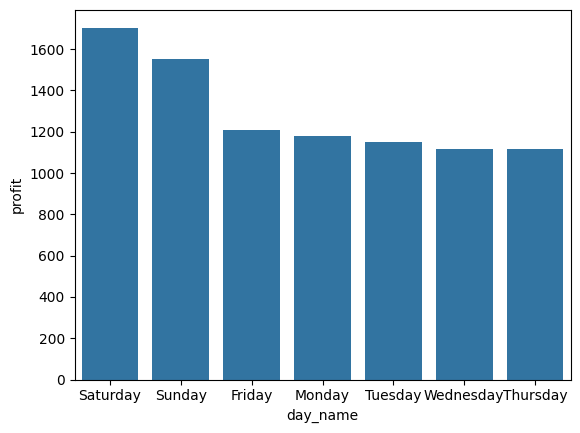

In [265]:
sns.barplot(x=dt['day_name'],y=dt['profit'])

<Axes: xlabel='datetime', ylabel='profit'>

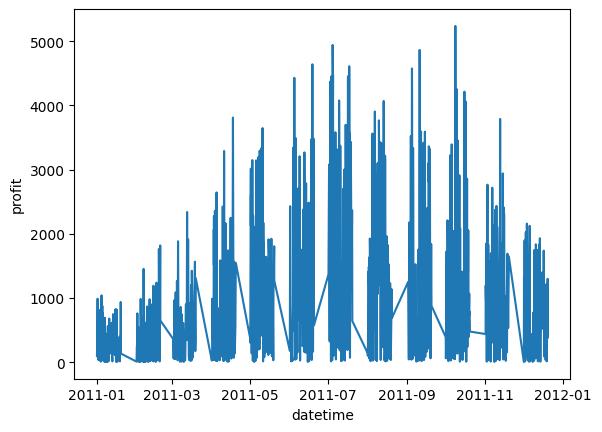

In [266]:
sns.lineplot(x=df[df['datetime'].dt.year==2011]['datetime'],y=df[df['datetime'].dt.year==2011]['profit'])

In [267]:
df.groupby('season')[['profit','registered']].sum()

,profit,registered
season,,
Fall,1.193484e+06,124858
Spring,4.903152e+05,69806
Summer,1.019231e+06,113738
Winter,9.197164e+05,127273


In [268]:
df.groupby('season')[['profit']].sum().sort_values('profit',ascending=False)

,profit
season,
Fall,1.193484e+06
Summer,1.019231e+06
Winter,9.197164e+05
Spring,4.903152e+05


In [269]:
df.groupby('season')[['registered']].sum().sort_values('registered',ascending=False)

,registered
season,
Winter,127273
Fall,124858
Summer,113738
Spring,69806


In [270]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hours,year,month,day_name,profit
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,-1405.4,3,2011,1,Saturday,94.428767
11,2011-01-01 11:00:00,Spring,1.0,0.0,Clear,14.76,81.0,19.0012,26,30,56,-923.8,11,2011,1,Saturday,576.028767
14,2011-01-01 14:00:00,Spring,0.0,0.0,Mist,18.86,72.0,19.0012,35,71,106,-592.7,14,2011,1,Saturday,907.128767
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,19.9995,40,70,110,-511.0,15,2011,1,Saturday,988.828767
16,2011-01-01 16:00:00,Spring,0.0,0.0,Mist,17.22,82.0,19.9995,41,52,93,-571.2,16,2011,1,Saturday,928.628767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,2012-12-19 10:00:00,Winter,0.0,1.0,Clear,13.12,70.0,7.0015,17,147,164,-575.5,10,2012,12,Wednesday,924.328767
10873,2012-12-19 11:00:00,Winter,0.0,1.0,Clear,16.40,54.0,15.0013,31,169,200,-240.1,11,2012,12,Wednesday,1259.728767
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,35.1,19,2012,12,Wednesday,1534.928767
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,-726.0,21,2012,12,Wednesday,773.828767


<Axes: >

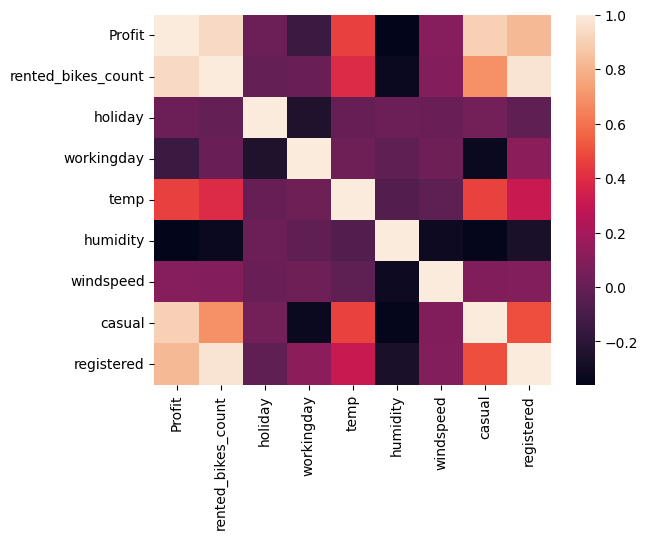

In [271]:
sns.heatmap(correlation)